In [1]:
import sqlite3
import pandas
import numpy
import matplotlib.pyplot as plt
pandas.set_option('display.max_rows', None)
#pandas.set_option('display.max_columns', None)
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

# PART 1
# The following query is a nested select query in SQL. The sub query first does an inner join on the Salaries and Teams table and selects everything from those tables. The inner join records tuples that have the same yearID and teamID between the two tables being joined. The outer select query selects for columns of interest from the joined tables, in addition to the percent wins and total (summed) salary of all players. These aggregates are calculated using the GROUP BY sql statement for teamID and yearID To get these values across team players and for each year. 
sql_query = ("""SELECT yearID, teamID, name, lgID, franchID, W as Wins,G as Games, 100.0*W/G as percent_wins, SUM(salary) as total_salary
                FROM (Select * 
                FROM Salaries,Teams 
                ON Salaries.yearID == Teams.yearID 
                AND Salaries.teamID == Teams.teamID)
                GROUP BY teamID, yearID
                ORDER BY teamID""")
sql_team_salaries = pandas.read_sql(sql_query,conn)
print(sql_team_salaries.head(26))

# PART 1 PROBLEM 1
# Missing data is present since there are data in years prior to 1997, as early as 1985, in the Teams table. However, since there is no player-salary data for these years in the Salaries table, an inner join is appropriate since it excludes non-matching tuples. A left join on the Salaries table would have also yielded the same result. This approach basically excludes the years of data between 1985 to 1997 from the Teams table since there is no matching yearID or teamID for those years onto the Salaries table. 




# Ignore the following code
###############################################################################################
## Pandas equivalent to above SQL statement ##

#salary_query = ("""Select * from Salaries""")
#team_salaries = pandas.read_sql(salary_query, conn)
#team_query = ("""Select * from Teams""")
#teams = pandas.read_sql(team_query,conn)

#print(team_salaries.head(5))
#print(teams.head(5))

#yearly_sal = pandas.merge(team_salaries, teams, how = "left", 
#               on = ["yearID", "teamID", "lgID"])
#yearly_sal = yearly_sal[["playerID","salary", "yearID","lgID","teamID", "franchID", "W","G"]]
#relation1 = yearly_sal.groupby(by=["teamID","yearID"]).sum()
#relation1['Percent_Wins'] = (relation1["W"])/(relation1["G"])*100
#print(relation1)





    yearID teamID                  name lgID franchID  Wins  Games  \
0     1997    ANA        Anaheim Angels   AL      ANA    84    162   
1     1998    ANA        Anaheim Angels   AL      ANA    85    162   
2     1999    ANA        Anaheim Angels   AL      ANA    70    162   
3     2000    ANA        Anaheim Angels   AL      ANA    82    162   
4     2001    ANA        Anaheim Angels   AL      ANA    75    162   
5     2002    ANA        Anaheim Angels   AL      ANA    99    162   
6     2003    ANA        Anaheim Angels   AL      ANA    77    162   
7     2004    ANA        Anaheim Angels   AL      ANA    92    162   
8     1998    ARI  Arizona Diamondbacks   NL      ARI    65    162   
9     1999    ARI  Arizona Diamondbacks   NL      ARI   100    162   
10    2000    ARI  Arizona Diamondbacks   NL      ARI    85    162   
11    2001    ARI  Arizona Diamondbacks   NL      ARI    92    162   
12    2002    ARI  Arizona Diamondbacks   NL      ARI    98    162   
13    2003    ARI  A

Text(0.5, 1.0, 'Variation of Total Payrolls Across Teams between 1990 - 2014')

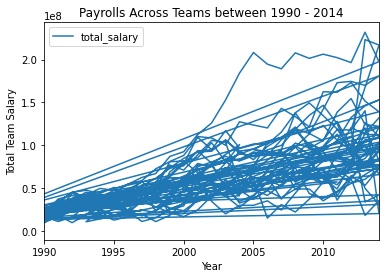

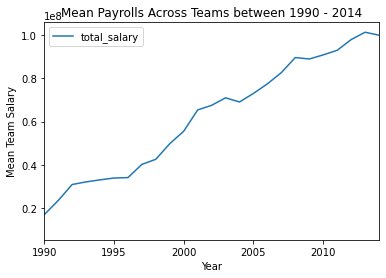

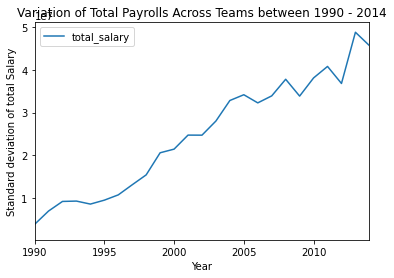

In [2]:
## PART 2 Exploratory Analysis
# PROBLEM 2
team_salaries = sql_team_salaries
# Make a plot for all team salaries across the range of years between 1990 - 2014. Here, team salaries are the sums of each player's salaries for each year and for each team. 
a = team_salaries.plot(x='yearID',y='total_salary',xlim = (1990, 2014))
a.set_xlabel('Year')
a.set_ylabel('Total Team Salary')
a.set_title('Payrolls Across Teams between 1990 - 2014')

## PART 2 QUESTION 1 
# The first figure plots all team's total payrolls for every year between 1990 - 2014 superimposed on one another. Each line corresponds to one team's total payroll for that year. The lines are all superimposed onto a single graph to save space and make trends clearer. There is a trend for payrolls to increase over time. This first plot also suggests that as time increases, so does the variability of total payrolls across teams.

# PART 2 PROBLEM 3
# The following code produces two plots. One for mean payroll over time, and one for the standard deviation of total payrolls over time. Both work by grouping across team payrolls for each year to get a single average and standard deviation of all payroll data for each year. 

# Calculate the mean total salary across teams for each year by grouping by year
mean_salaries = team_salaries.groupby(by=["yearID"]).mean()
# Plot the mean salaries, notice how there is no specification for x in plot since it is a groupby object
b = mean_salaries.plot(y='total_salary',xlim = (1990, 2014))
b.set_xlabel('Year')
b.set_ylabel('Mean Team Salary')
b.set_title('Mean Payrolls Across Teams between 1990 - 2014')


# Calculate the standard deviation for total salary across teams for each year
std_salaries = team_salaries.groupby(by=["yearID"]).std()
#print(mean_salaries.head(20))
# Plot starts here
c = std_salaries.plot(y='total_salary',xlim = (1990, 2014))
c.set_xlabel('Year')
c.set_ylabel('Standard deviation of total Salary')
c.set_title('Variation of Total Payrolls Across Teams between 1990 - 2014')

Display the group column showing how each tuple was grouped into a time period
                                         yearID       Wins       Games  \
group     name                                                           
1985-1991 Anaheim Angels                    NaN        NaN         NaN   
          Arizona Diamondbacks              NaN        NaN         NaN   
          Atlanta Braves                 1987.5  64.833333  161.166667   
          Baltimore Orioles              1987.5  73.333333  161.500000   
          Boston Red Sox                 1987.5  85.666667  162.000000   
          California Angels              1987.5  83.833333  162.000000   
          Chicago Cubs                   1987.5  78.333333  161.666667   
          Chicago White Sox              1987.5  78.000000  161.833333   
          Cincinnati Reds                1987.5  85.333333  161.833333   
          Cleveland Indians              1987.5  72.166667  162.166667   
          Colorado Rockies       

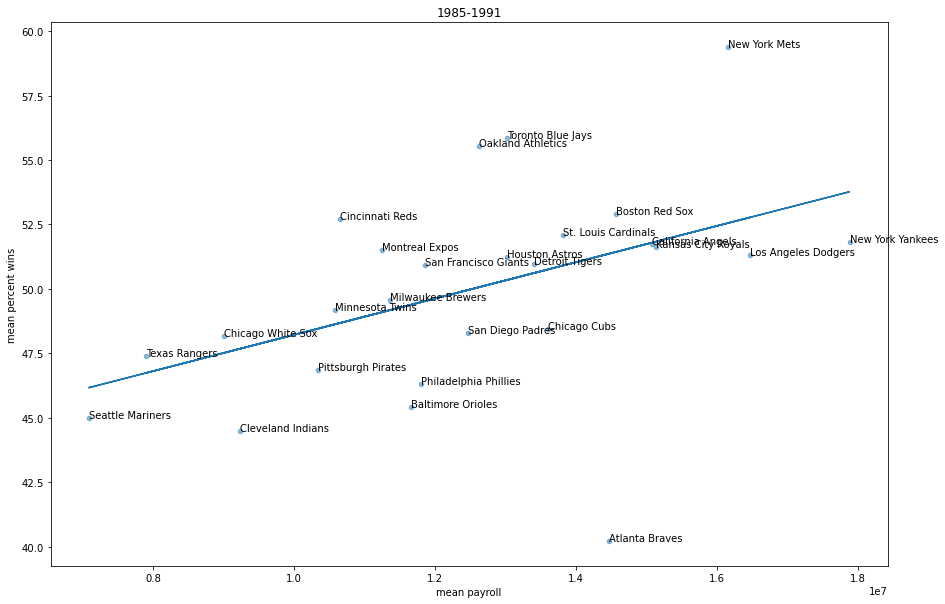

Slope = 
1.808870329173718e-07


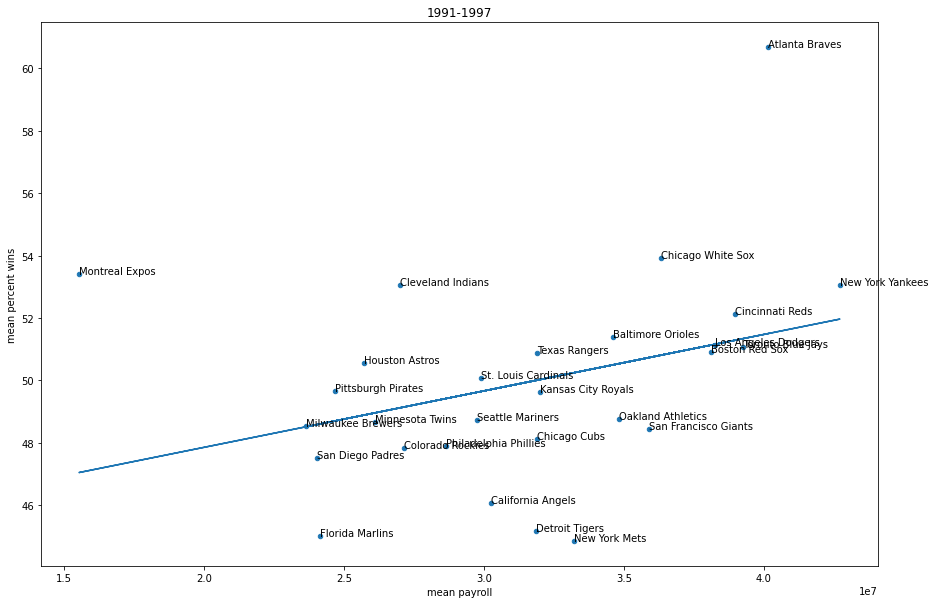

Slope = 
2.0480780481103102e-07


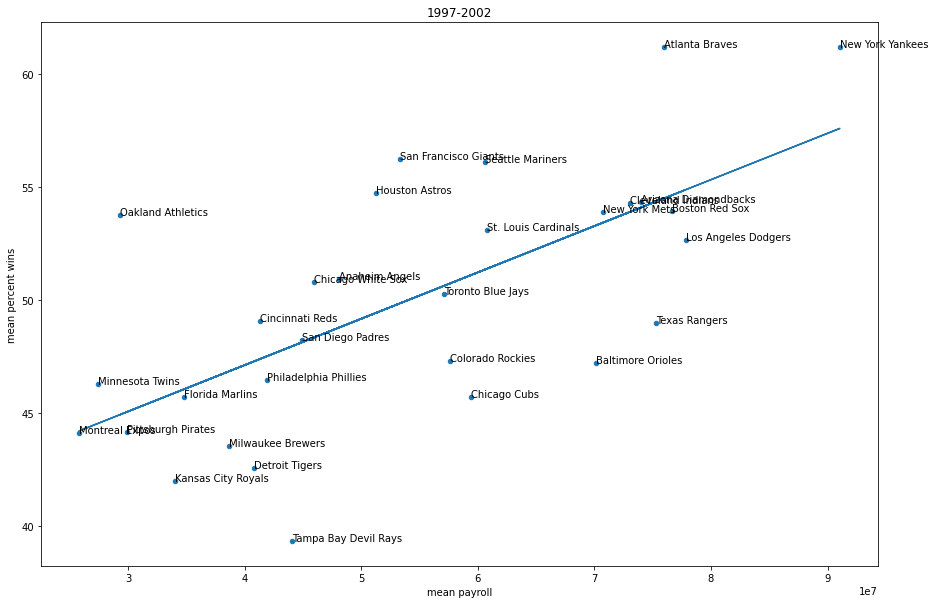

Slope = 
9.655300387253861e-08


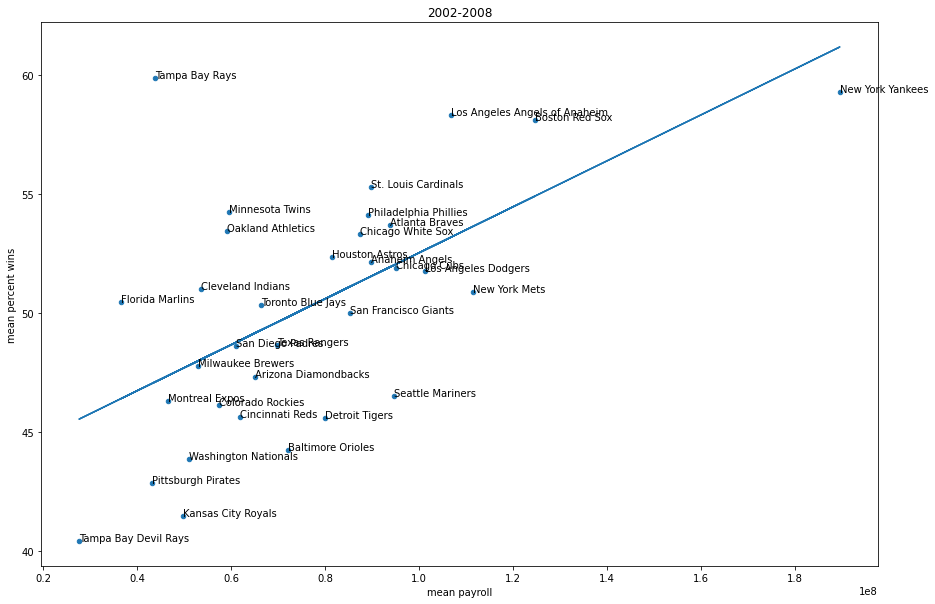

Slope = 
6.916011077605056e-08


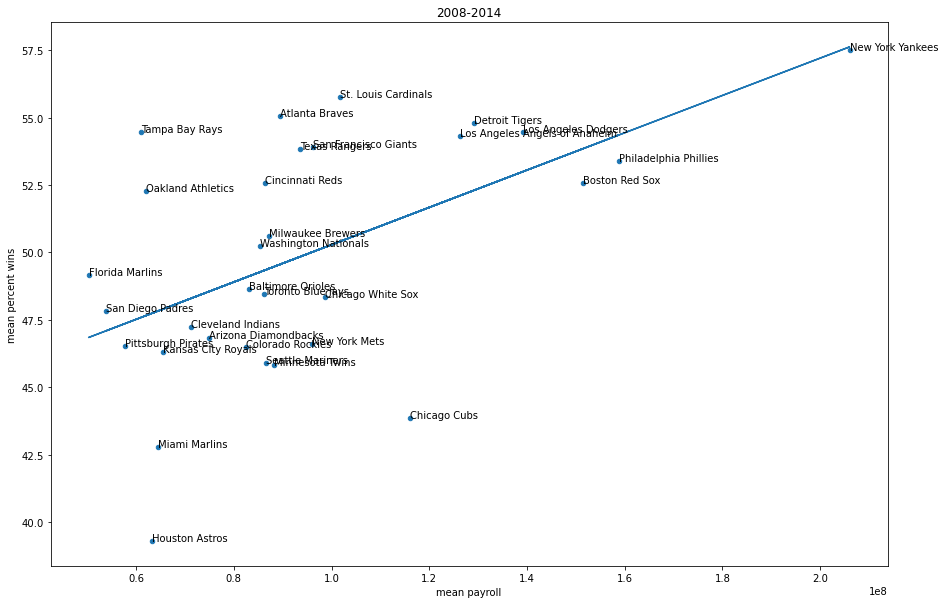

In [3]:
## PART 2 PROBLEM 4

# This helper function adds a regression line and labels points in the scatter plot passed in as graf. 
# The data that made graf is contained in df
def annotate(graf, df):
    # Iterate through all points of team_names
    for i, txt in enumerate(df.team_names):
        # Annotate the scatterplot at x,y points in the scatter plot with txt
        graf.annotate(txt, (df.mean_salary.iat[i], df.percent_wins.iat[i]))
    # Create x and y arrays for the points in the scatter plots
    x = numpy.array(df.mean_salary)
    y = numpy.array(df.percent_wins)
    # Delete nans from x and y arrays
    x = x[~numpy.isnan(x)]
    y = y[~numpy.isnan(y)]
    # Create polyfit regression line m and b values and plot
    m, b = numpy.polyfit(x,y,1)
    graf.plot(x, m*x+b)
    # Print slope for interpretation
    print("Slope = ")
    print(m)
    plt.show()

mean_salaries = []
# Get the mean team salaries table here, grouping by yearID, name and teamID and getting a mean for all numeric values
# mean_salaries was calculated earlier and contains average data across all teams for each year. This group-by object contains mean percent_wins and mean total_salary
mean_salaries = team_salaries.groupby(by=["yearID", "name", "teamID"]).mean()
# Reset the index so that yearID appears as one of the columns in the dataframe object instead of index (for future calculations)
mean_salaries = mean_salaries.reset_index()
# Rename total salary to mean_salary since that's what it is
mean_salaries.rename(columns={'total_salary':'mean_salary'}, inplace=True)
# Create groupings for the total range of data between 1985 - 2014 into 5 time periods labeled below
disc_salaries = pandas.cut(mean_salaries['yearID'],bins=numpy.linspace(1984,2015, 6), precision = 0, 
                           labels =['1985-1991','1991-1997','1997-2002','2002-2008','2008-2014'])
# Add these categorizations back into the dataframe in a new column 'group'
mean_salaries['group'] = disc_salaries
#print(mean_salaries.head(40))
# Further group the data by team name
avg_periods = mean_salaries.groupby(by=["group", "name"]).mean()
print("Display the group column showing how each tuple was grouped into a time period")
print(avg_periods.head(20))
print('\n\n')


# Break down the dataframe by time periods into 5 separate dataframes
df1, df2, df3, df4, df5 = [x for _, x in avg_periods.groupby(by=["group"])] 

# The following lines are duplicated for each of the 5 dataframes for each time period
# Create a label for this time period and extract that string value for figure title
templabels = df1.index.get_level_values('group')
title1 = templabels[0]
templabels = df2.index.get_level_values('group')
title2 = templabels[0]
templabels = df3.index.get_level_values('group')
title3 = templabels[0]
templabels = df4.index.get_level_values('group')
title4 = templabels[0]
templabels = df5.index.get_level_values('group')
title5 = templabels[0]

# Extract all of the team names from each dataframe
names = df1.index.get_level_values('name')
# Put the team names back into each dataframe in a new column 'team_names'
# This is necessary since groupby objects made name and yearID an index, no longer a column
df1['team_names'] = names 
names = df2.index.get_level_values('name')
df2['team_names'] = names 
names = df3.index.get_level_values('name')
df3['team_names'] = names 
names = df4.index.get_level_values('name')
df4['team_names'] = names 
names = df5.index.get_level_values('name')
df5['team_names'] = names 

# For each dataframe corresponding to each time period, plot the results in a scatte rplot for mean payroll on x-axis and mean percent wins on y axis
d1 = df1.plot.scatter(x='mean_salary', y='percent_wins', title = title1, alpha = 0.5, figsize=(15,10))
d1.set_xlabel('mean payroll')
d1.set_ylabel('mean percent wins')
# Call on helper function to add a regression line and text annotations for team names of each point on scatter plot
annotate(d1,df1)

d2 = df2.plot.scatter(x='mean_salary', y='percent_wins', title = title2, figsize=(15,10))
d2.set_xlabel('mean payroll')
d2.set_ylabel('mean percent wins')
annotate(d2,df2)

d3 = df3.plot.scatter(x='mean_salary', y='percent_wins', title = title3, figsize=(15,10))
d3.set_xlabel('mean payroll')
d3.set_ylabel('mean percent wins')
annotate(d3,df3)

d4 = df4.plot.scatter(x='mean_salary', y='percent_wins', title = title4, figsize=(15,10))
d4.set_xlabel('mean payroll')
d4.set_ylabel('mean percent wins')
annotate(d4,df4)

d5 = df5.plot.scatter(x='mean_salary', y='percent_wins', title = title5, figsize=(15,10))
d5.set_xlabel('mean payroll')
d5.set_ylabel('mean percent wins')
annotate(d5, df5)


# PART 2 QUESTION 2
#Based on the slopes printed above each graph for each time period, it appears that the strength of the relationship between mean payroll and chance of winning increase with time across periods. This is demonstrated by the slope first being 7.03*10^7 in 1985-1991. Although it decreased in the following two periods, the slope increased by a magnitude of 10 in 2002-2008 to a slope of 9.65*10^8 and this change was maintained in 2008-2014. What we can deduce from this is that in the two most recent time periods analyzed, there is a stronger positive correlation between mean payroll and percent wins. This suggests that the the more money the teams receive, the higher their chances of winning. The period between 1991 - 1997 had the weakest correlation in this respect. 
# Between 2002 and 2014, it is interesting that the Tampa Bay Rays had over 50% wins across both time periods despite being on the lower end of mean payrolls per team, this means that their team was very efficient with their spending and did not need to spend much to have a higher chance of winning. 
# Between 1997-2002, the New York Yankees are seen spending the most on average on their teams, and also had some of the highest winning percentages across those periods. This agrees with the positive correlation indicated by the regression line. 
# Oakland athletics in 1985-1991 started out with a high mean percent wins despite their average payroll. Their percent wins dropped in the next time period despite them spending more money. Then interestingly between 1997 until 2014 their spending was reduced and their mean percent wins were above the regression line for these last 3 time periods. 

In [4]:
#PART 3 PROBLEM 5
# Rename salary for this part to total_salary to avoid conflicting with mean_salary calculated here across teams
mean_salaries.rename(columns={'mean_salary':'total_salary'}, inplace = True)

# Get an average of all salaries across teams for each year to get an average payroll value for each year
avg_pay_by_year = mean_salaries.groupby(by=["yearID"]).mean()
# Save yearID into its own column so its not just an index
avg_pay_by_year['yearID'] = avg_pay_by_year.index.get_level_values('yearID')
# Rename index to idx to avoid confusion
avg_pay_by_year.index.name = 'idx'
# Rename total salary to mean salary because that's what it is now
avg_pay_by_year.rename(columns={'total_salary':'mean_salary'}, inplace=True)

# Repeat above for standard deviation
std_by_year = mean_salaries.groupby(by=["yearID"]).std()
# Save yearID into its own column so its not just an index
std_by_year['yearID'] = std_by_year.index.get_level_values('yearID')
std_by_year.index.name = 'idx'
std_by_year.rename(columns={'total_salary':'std_salary'}, inplace=True)
#print(std_by_year.head(20))

# Extract the mean salary and year data  from the first table created here
newcol = avg_pay_by_year[["mean_salary", "yearID"]]
# Copy those columns into a new dataframe
avg_by_year = newcol.copy()
# Copy over the standard deviation values
avg_by_year['std_salary'] = std_by_year.std_salary
#print(avg_by_year)


# Put this new data into the mean_salaries dataframe we are working with by doing a left join on yearID common to both tables
# So we should have the same mean_salary and std_salary across each repetition of yearID to use in calculation
mean_salaries = pandas.merge(mean_salaries, avg_by_year, how = "left", 
               on = ["yearID"])

# Now create a new column for the standardized payroll we are trying to calculate for this problem 5
mean_salaries['standardized_payroll'] = (mean_salaries.total_salary - mean_salaries.mean_salary)/mean_salaries.std_salary
print("Display the dataframe now with standardized_payroll as a column")
print(mean_salaries.head(10))
print('\n')



Display the dataframe now with standardized_payroll as a column
   yearID               name teamID  Wins  Games  percent_wins  total_salary  \
0    1985     Atlanta Braves    ATL    66    162     40.740741    14807000.0   
1    1985  Baltimore Orioles    BAL    83    161     51.552795    11560712.0   
2    1985     Boston Red Sox    BOS    81    163     49.693252    10897560.0   
3    1985  California Angels    CAL    90    162     55.555556    14427894.0   
4    1985       Chicago Cubs    CHN    77    162     47.530864    12702917.0   
5    1985  Chicago White Sox    CHA    85    163     52.147239     9846178.0   
6    1985    Cincinnati Reds    CIN    89    162     54.938272     8359917.0   
7    1985  Cleveland Indians    CLE    60    162     37.037037     6551666.0   
8    1985     Detroit Tigers    DET    84    161     52.173913    10348143.0   
9    1985     Houston Astros    HOU    83    162     51.234568     9993051.0   

       group   mean_salary    std_salary  standardized_

Slope = 2.2366967494301515


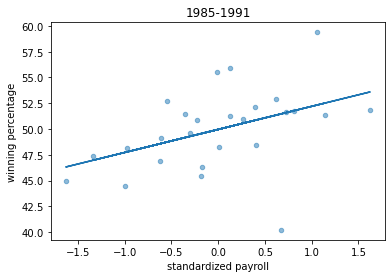

Slope = 1.4797925544063024


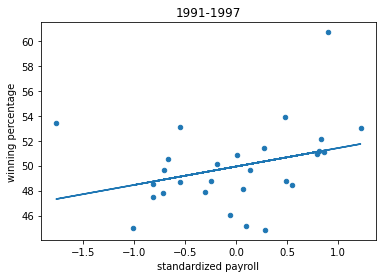

Slope = 4.176400344614265


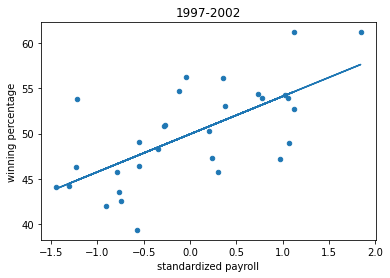

Slope = 3.0723710984916774


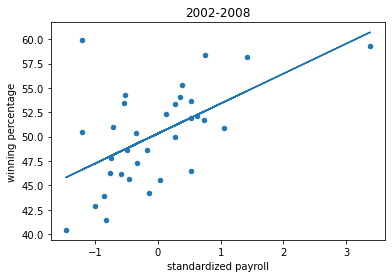

Slope = 2.7084664524831297


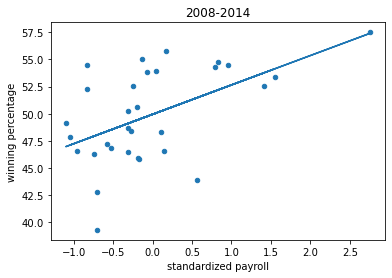

In [5]:
# PART 3 PROBLEM 6
# The helper function below is the same as the one defined earlier, but this time does the regression on standardized payroll calculated in Part 3 problem 5
# This function also doesn't annotate each data point in the scatter plot
def annotate2(graf, df):
    # Create x and y arrays for the points in the scatter plots
    x = numpy.array(df.standardized_payroll)
    y = numpy.array(df.percent_wins)
    # Delete nans from x and y arrays
    x = x[~numpy.isnan(x)]
    y = y[~numpy.isnan(y)]
    # Create polyfit regression line m and b values and plot
    m, b = numpy.polyfit(x,y,1)
    graf.plot(x, m*x+b)
    # Print slope for interpretation
    print("Slope = {}".format(m))
    plt.show()

 # Group by time period (group) and team names   
std_periods = mean_salaries.groupby(by=["group", "name"]).mean()
#print(std_periods.head(20))
# Split the  dataframe std_periods into 5 dataframes, one corresponding to each time period
ef1, ef2, ef3, ef4, ef5 = [x for _, x in std_periods.groupby(by=["group"])] 

# The following parts of code are repeated 5 times for each of the time period's dataframes
# Get a label for the time period for the current dataframe
templabels = ef1.index.get_level_values('group')
# Save that time period as a string to serve as the figure title
title1 = templabels[0]
templabels = ef2.index.get_level_values('group')
title2 = templabels[0]
templabels = ef3.index.get_level_values('group')
title3 = templabels[0]
templabels = ef4.index.get_level_values('group')
title4 = templabels[0]
templabels = ef5.index.get_level_values('group')
title5 = templabels[0]

# Get a column for names of teams and insert that back into the dataframe for each time period. This is done since team names were stored as an index instead of a column as a result of the groupby
names = ef1.index.get_level_values('name')
ef1['team_names'] = names 
names = ef2.index.get_level_values('name')
ef2['team_names'] = names 
names = ef3.index.get_level_values('name')
ef3['team_names'] = names 
names = ef4.index.get_level_values('name')
ef4['team_names'] = names 
names = ef5.index.get_level_values('name')
ef5['team_names'] = names 

# Create the scatter plots for each of the 5 time periods using standardized payroll (x axis) and percent wins (y axis)
e1 = ef1.plot.scatter(x='standardized_payroll', y='percent_wins', title = title1, alpha = 0.5)
e1.set_xlabel('standardized payroll')
e1.set_ylabel('winning percentage')
# Add linear regression line to each plot
annotate2(e1,ef1)
# Uncomment these lines to make a side by side comparison of the graphs
#d1 = df1.plot.scatter(x='total_salary', y='percent_wins', title = title1 + "Part 2", alpha = 0.5)
#annotate(d1, df1)

e2 = ef2.plot.scatter(x='standardized_payroll', y='percent_wins', title = title2)
e2.set_xlabel('standardized payroll')
e2.set_ylabel('winning percentage')
annotate2(e2,ef2)
#d2 = df2.plot.scatter(x='total_salary', y='percent_wins', title = title2+ "Part 2", alpha = 0.5)
#annotate(d2, df2)

e3 = ef3.plot.scatter(x='standardized_payroll', y='percent_wins', title = title3)
e3.set_xlabel('standardized payroll')
e3.set_ylabel('winning percentage')
annotate2(e3,ef3)
#d3 = df3.plot.scatter(x='total_salary', y='percent_wins', title = title3+ "Part 2", alpha = 0.5)
#annotate(d3, df3)

e4 = ef4.plot.scatter(x='standardized_payroll', y='percent_wins', title = title4)
e4.set_xlabel('standardized payroll')
e4.set_ylabel('winning percentage')
annotate2(e4,ef4)
#d4 = df4.plot.scatter(x='total_salary', y='percent_wins', title = title4+ "Part 2", alpha = 0.5)
#annotate(d4, df4)

e5 = ef5.plot.scatter(x='standardized_payroll', y='percent_wins', title = title5)
e5.set_xlabel('standardized payroll')
e5.set_ylabel('winning percentage')
annotate2(e5,ef5)
#d5 = df5.plot.scatter(x='total_salary', y='percent_wins', title = title5+ "Part 2", alpha = 0.5)
#annotate(d5, df5)


# PART 3 QUESTION 3 
# The transformation on the payroll variable is the x-axis variable for the scatter plots in problem 4 and 6. The standardization we did centers the average payroll around the value 0. So the mean is 0 for the standardized plots, and the standard deviation is 1. This is done by taking the mean of each payroll for each team and subtracting the average payroll for that year, and then scaling this difference by the standard deviation for that year. The result we get is a scatter plot with values whose mean is at 0. 


Slope = 2.8947070854072643


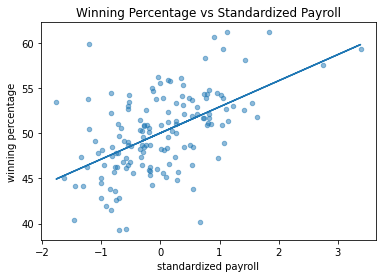

Show the calculation of expected_win_pct column

   yearID               name teamID  Wins  Games  percent_wins  total_salary  \
0    1985     Atlanta Braves    ATL    66    162     40.740741    14807000.0   
1    1985  Baltimore Orioles    BAL    83    161     51.552795    11560712.0   
2    1985     Boston Red Sox    BOS    81    163     49.693252    10897560.0   
3    1985  California Angels    CAL    90    162     55.555556    14427894.0   
4    1985       Chicago Cubs    CHN    77    162     47.530864    12702917.0   
5    1985  Chicago White Sox    CHA    85    163     52.147239     9846178.0   
6    1985    Cincinnati Reds    CIN    89    162     54.938272     8359917.0   
7    1985  Cleveland Indians    CLE    60    162     37.037037     6551666.0   
8    1985     Detroit Tigers    DET    84    161     52.173913    10348143.0   
9    1985     Houston Astros    HOU    83    162     51.234568     9993051.0   

       group   mean_salary    std_salary  standardized_payroll  \
0  1

<AxesSubplot:title={'center':'TBA Efficiency Over Time'}, xlabel='Time', ylabel='Efficiency'>

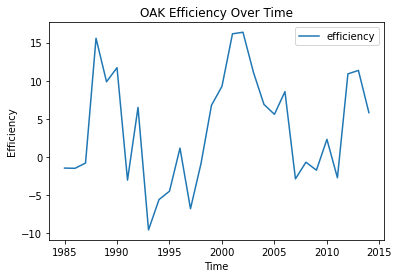

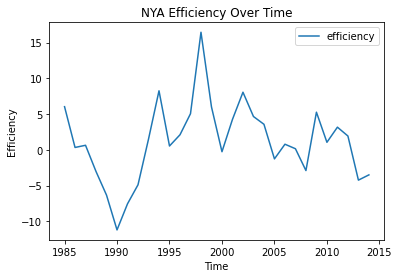

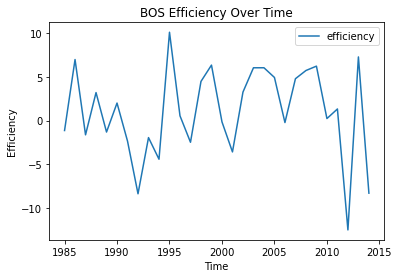

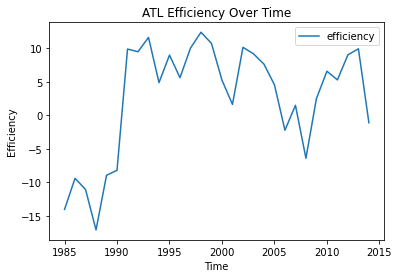

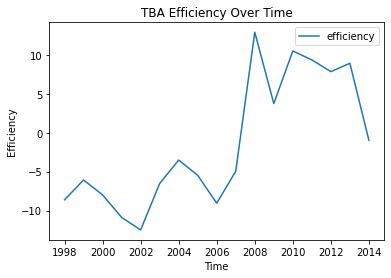

In [6]:
# PART 3 PROBLEM 7
# Plot single correlation scatter plot across the 5 standardized time periods
f1 = std_periods.plot.scatter(x='standardized_payroll', y='percent_wins', title = 'Winning Percentage vs Standardized Payroll', alpha = 0.5)
f1.set_xlabel('standardized payroll')
f1.set_ylabel('winning percentage')
# Add in the regression line
annotate2(f1,std_periods)
# calculate expected_win_pct with the following formula on standardized payroll
mean_salaries['expected_win_pct'] = (mean_salaries.standardized_payroll*2.5)+50
print("Show the calculation of expected_win_pct column\n")
print(mean_salaries.head(10))
print('\n\n')


# PART 3 PROBLEM 8
# Calculate efficiency by subtracting win percentage for each team of each year by the expected winning percentage for each year for each team
mean_salaries['efficiency'] = mean_salaries.percent_wins - mean_salaries.expected_win_pct
print("Show the calculation of efficiency column")
print(mean_salaries.head(10))
print('\n\n')

# make a line plot for 5 specific teams
# First extract the team data using teamID
oak = mean_salaries.loc[mean_salaries['teamID'] == 'OAK']
nya = mean_salaries.loc[mean_salaries['teamID'] == 'NYA']
bos = mean_salaries.loc[mean_salaries['teamID'] == 'BOS']
atl = mean_salaries.loc[mean_salaries['teamID'] == 'ATL']
tba = mean_salaries.loc[mean_salaries['teamID'] == 'TBA']
# Now make the plots using year as x axis and efficiency as y axis. 
oak.plot(x = 'yearID', y = 'efficiency', title = 'OAK Efficiency Over Time', xlabel = 'Time', ylabel = 'Efficiency')
nya.plot(x = 'yearID', y = 'efficiency', title = 'NYA Efficiency Over Time', xlabel = 'Time', ylabel = 'Efficiency')
bos.plot(x = 'yearID', y = 'efficiency', title = 'BOS Efficiency Over Time', xlabel = 'Time', ylabel = 'Efficiency')
atl.plot(x = 'yearID', y = 'efficiency', title = 'ATL Efficiency Over Time', xlabel = 'Time', ylabel = 'Efficiency')
tba.plot(x = 'yearID', y = 'efficiency', title = 'TBA Efficiency Over Time', xlabel = 'Time', ylabel = 'Efficiency')




In [7]:
# PART 3 QUESTION 4
# From these plots we can see more clearly the correlation between winning percent and payroll. This was done by first getting an expected value of win percentage based on the standardized payroll and developing a formula that allowed one to estimate the chances of winning based on payroll. Using this expected value, one could then compare it to observed value and calculate how efficient a team was at spending and winning.
# Instead of having a separate graph for each time period, we can see data continuously across the years. The down side of these plots is we can really only appreciate them for a single team at a time, rather than plotting all teams on a scatter plot in the correlation plots from questions 2 and 3. So we get a narrower view of our data but a clear representation of spending efficiency for each year. The scatterplots in questions 2 and 3 give us a much broader view for a 6 year period, how much payroll correlated with percent wins. 
# The moneyball period beginning in 2003 shows that spending efficiency for OAK appeared to increase to its peak during this time. 